# Project on Music Genre Classification

In [10]:
import librosa  #library for audio and music analysis
import pandas as pd  #used to analyze data
import numpy as np #package for numerical computing
import IPython #Alternative python interpreter
import scipy #package for scientific computing
import seaborn as sns # To visualize data
import librosa.display as lplt
import matplotlib.pyplot as plt # for insightful plots

In [11]:
#Print Project name
print("Diploma in AI and ML - Project on Music Genre Classification")
#Load data
df = pd.read_csv('D:\\Diploma project\\Data\\features_3_sec.csv') # reading the data from CSV file
df.head() # returns specific number of rows from top

Diploma in AI and ML - Project on Music Genre Classification


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [12]:
print("The dataset we are using has", df.shape)
print("Count of samples")
df.label.value_counts().reset_index() #returns a list containing counts of unique rows in the DataFrame.

The dataset we are using has (9990, 60)
Count of samples


,index,label
0,blues,1000
1,jazz,1000
2,metal,1000
3,pop,1000
4,reggae,1000
5,disco,999
6,classical,998
7,hiphop,998
8,rock,998
9,country,997


# Exploratory Data analysis

In [13]:
audio_file_path = 'D:\\Diploma project\\Data\\genres_original\\blues\\blues.00000.wav'
data, sr = librosa.load(audio_file_path) # we are loading an audio file as a floating point time series
data, _ = librosa.effects.trim(data) # trims silence from an audio signal

In [14]:
print(data)

[ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847]


In [15]:
#use IPython and play a sample file

IPython.display.Audio(data, rate = sr)

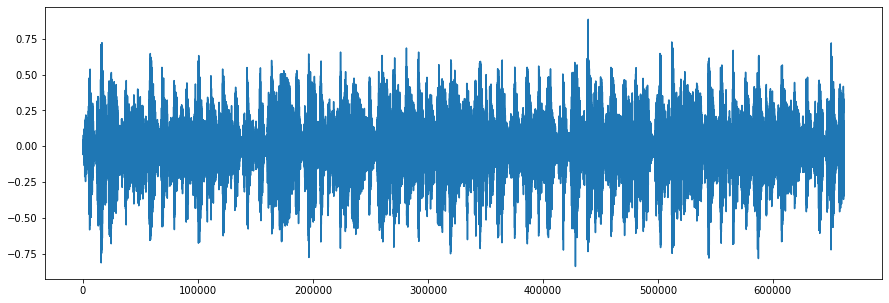

In [16]:
plt.figure(figsize = (15,5)) #Create a figure object
plt.plot(data) 
plt.show() #show the plot on UI

C:\Users\Prasanth Kolachana\Anaconda\lib\site-packages\librosa\util\decorators.py:88: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  return f(*args, **kwargs)
C:\Users\Prasanth Kolachana\Anaconda\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  return f(*args, **kwargs)


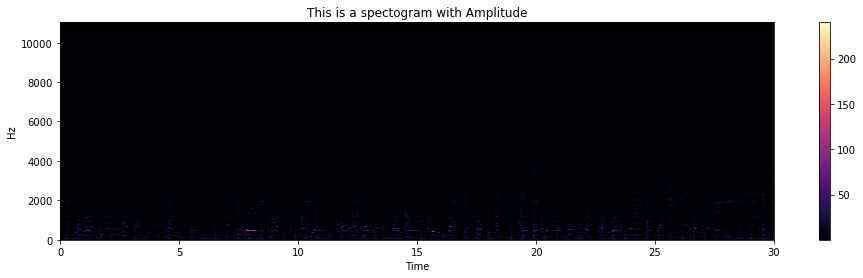

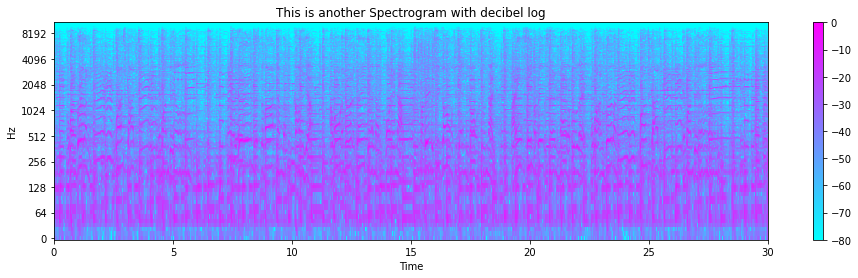

In [17]:
#Visualizing the audio signal

window_size_FFT = 2048
Hop_length = 512

STFT = librosa.stft(data, n_fft = window_size_FFT,hop_length=Hop_length) # STFT stands for Short time fourier transform 
                                                                         #which represents a signal in time frequency domain

STFT_DB= librosa.amplitude_to_db(STFT, ref=np.max)                # convert amplitude spectogram to decibel scaled spectogram.
 
plt.figure(figsize = (16,4))
lplt.specshow(STFT, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.title("This is a spectogram with Amplitude")
plt.show()

plt.figure(figsize=(16,4))
lplt.specshow(STFT_DB, sr=sr, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar()
plt.title("This is another Spectrogram with decibel log")
plt.show()

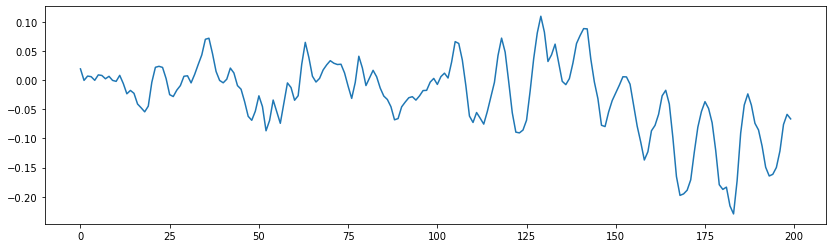

In [18]:
#How the audio wave looks when zoomed in

begin = 2000
end = 2200
plt.figure(figsize=(14,4))
plt.plot(data[begin:end])
plt.show()

C:\Users\PRASAN~1\AppData\Local\Temp/ipykernel_18768/1205887990.py:1: FutureWarning: Pass y=[ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma_color = librosa.feature.chroma_stft(data, sr=sr)  # we are computing a chromagram from a spectrogram


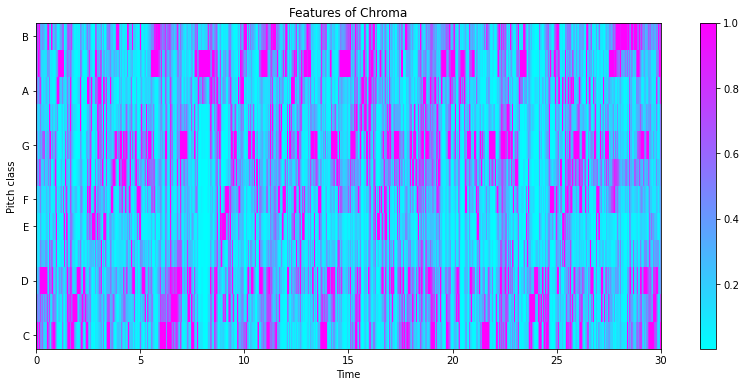

In [19]:
chroma_color = librosa.feature.chroma_stft(data, sr=sr)  # we are computing a chromagram from a spectrogram
plt.figure(figsize=(14,6))
lplt.specshow(chroma_color, sr=sr, x_axis='time', y_axis='chroma', cmap='cool')
plt.colorbar()
plt.title("Features of Chroma")
plt.show()

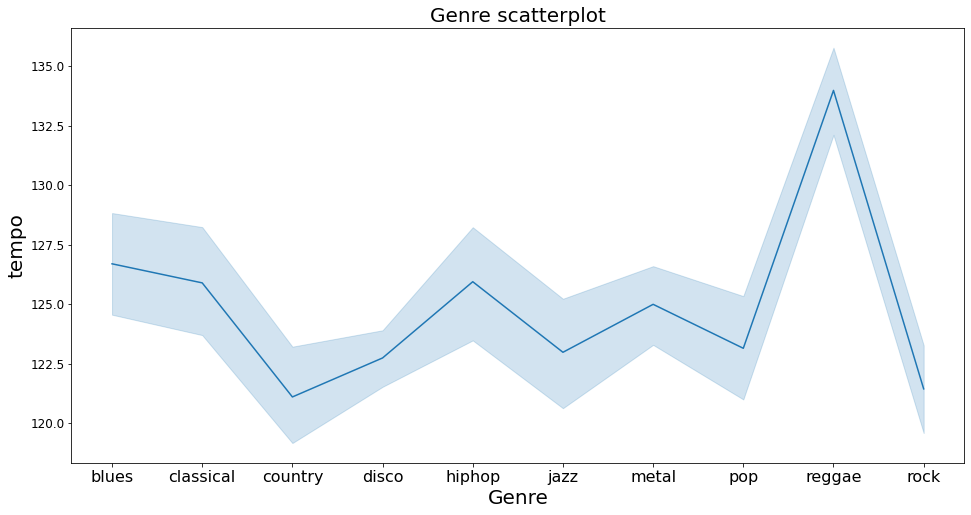

In [20]:
y= df[['label','tempo']]

figure, axis = plt.subplots(figsize=(16, 8));

sns.lineplot(x='label',y='tempo',data=y,palette = 'red') #lineplot
plt.title('Genre scatterplot', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 12);
plt.xlabel("Genre", fontsize = 20)
plt.ylabel("tempo", fontsize = 20)
plt.savefig("Plot.png") #save plot to a image file

In [21]:
#please don't run this again

#import os

#genre_names = 'blues classical country disco hiphop jazz metal pop reggae rock'
#genre_names = genre_names.split()

#for g in genre_names:
#  path_audio = os.path.join('D:\\Diploma project\\Data\\genre_split\\',f'{g}')
#  os.makedirs(path_audio)

In [22]:
#from pydub import AudioSegment
#i = 0
#for g in genre_names:
#  j=0
#  print(f"{g}")
#  for filename in os.listdir(os.path.join('D:\\Diploma project\\Data\\genres_original\\',f"{g}")):

#    Audio  =  os.path.join(f'D:\\Diploma project\\Data\\genres_original\\{g}',f'{filename}')
#    j = j+1
#    for w in range(0,10):
#      i = i+1
#      #print(i)
#      t1 = 3*(w)*1000
#      t2 = 3*(w+1)*1000
#      Audio_new = AudioSegment.from_wav(Audio)
#      new_files = Audio_new[t1:t2]
#      new_files.export(f'D:\\Diploma project\\Data\\genre_split\\{g}\\{g+str(j)+str(w)}.wav', format="wav")

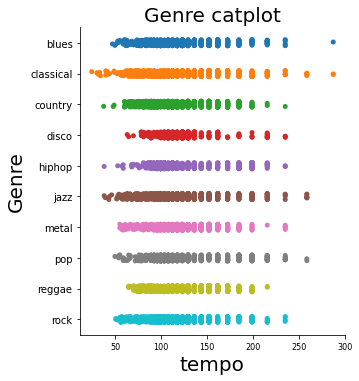

In [23]:
y= df[['label','tempo']]

#figure, axis = plt.subplots(figsize=(16, 8));

sns.catplot(x='tempo',y='label',data=y) #catplot
plt.title('Genre catplot', fontsize = 20)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 10);
plt.xlabel("tempo", fontsize = 20)
plt.ylabel("Genre", fontsize = 20)
plt.savefig("Plot.png")  #save plot to a image file

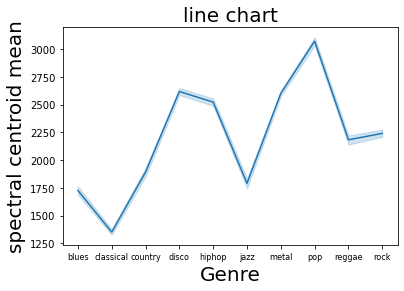

In [24]:
y= df[['label','spectral_centroid_mean']]
x= df[['label','spectral_centroid_var']]

#figure, axis = plt.subplots(figsize=(16, 8));

sns.lineplot(x='label',y='spectral_centroid_mean',data=y)
plt.title('line chart', fontsize = 20)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 20)
plt.ylabel("spectral centroid mean", fontsize = 20)
plt.savefig("Plot.png") #save plot to a image file

In [25]:
#Extract Features

mfccs = librosa.feature.mfcc(y= data, sr = sr, n_mfcc=16)
print(mfccs.shape)

(16, 1293)


In [26]:
mfccs

array([[-2.40635422e+02, -2.11214355e+02, -1.93908890e+02, ...,
        -1.09999146e+02, -8.68144226e+01, -8.40735855e+01],
       [ 9.96476440e+01,  1.01042831e+02,  1.02243958e+02, ...,
         1.50079346e+02,  1.38948669e+02,  1.38309769e+02],
       [-7.40327740e+00, -8.35852814e+00,  1.91543484e+00, ...,
        -5.07951355e+01, -3.65361443e+01, -2.81363564e+01],
       ...,
       [ 1.32614555e+01,  1.18887978e+01,  9.03036880e+00, ...,
        -1.00927711e-01, -2.84432173e-02,  1.90337133e+00],
       [ 5.46307850e+00,  2.25466251e-01,  2.91743422e+00, ...,
        -1.79763615e+00, -5.38624620e+00, -5.31086922e+00],
       [-6.78289413e+00, -8.12814236e+00, -6.26123619e+00, ...,
         7.35437584e+00,  1.82885277e+00,  1.18698215e+00]], dtype=float32)

In [27]:
def extracting_the_features(input_file):
    
    audio, sample_rate = librosa.load(input_file, res_type = 'kaiser_fast')
    features_mfcc = librosa.feature.mfcc(y=audio, sr = sample_rate, n_mfcc =60)
    scaled_features_mfcc = np.mean(features_mfcc.T, axis = 0)
    
    return scaled_features_mfcc
    
audio_files_dataset ='D:\\Diploma project\\Data\\genre_split'

image_files_dataset ='D:\\Diploma project\\Data\\images_original'
    

In [28]:
import numpy as np
from tqdm import tqdm
import os
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
new_df = pd.read_csv('D:\\Diploma project\\Data\\features_3_sec_new.csv')
extracted_features=[]
for index,j in tqdm(new_df.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_files_dataset), str(j["label"])+'\\',str(j["filename"]))
    #print(file_name)
    final_class_labels=j["label"]
    #print(final_class_labels)
    data=extracting_the_features(file_name)
    extracted_features.append([data,final_class_labels])


9990it [02:40, 62.16it/s]


In [29]:
extracted_features

[[array([-1.19018044e+02,  1.25080345e+02, -2.33943329e+01,  4.13217316e+01,
         -5.93189669e+00,  2.00927505e+01, -1.60315228e+01,  1.78110237e+01,
         -1.46437740e+01,  1.02183123e+01, -9.70155239e+00,  1.01689796e+01,
         -4.67266750e+00,  8.36433411e+00, -7.22530413e+00, -2.88166785e+00,
         -3.23004627e+00,  6.96385205e-01, -5.03594494e+00, -2.39584997e-01,
         -5.55846310e+00, -7.02079535e-01, -1.85958922e+00, -5.07153094e-01,
          2.75086117e+00,  3.19702148e+00, -3.47199965e+00, -4.55601263e+00,
          3.92221287e-03,  1.59872890e+00,  6.07892132e+00,  5.22229612e-01,
          2.92536855e+00, -4.57972765e+00,  1.71352327e+00, -2.40682483e+00,
          3.23478341e+00, -1.53047621e+00, -3.17709970e+00, -3.58112192e+00,
          2.83714741e-01,  3.13408256e-01, -3.30410480e+00, -2.71011734e+00,
         -3.48400497e+00, -2.43241620e+00,  7.73412764e-01,  6.30986261e+00,
          2.51713657e+00, -2.00751448e+00, -1.29007292e+00,  2.70766640e+00,

In [30]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','labels'])
extracted_features_df.head()

,feature,labels
0,"[-119.01804, 125.080345, -23.394333, 41.32173,...",blues
1,"[-125.97715, 122.3742, -20.67975, 50.03504, -1...",blues
2,"[-132.61815, 114.81552, -14.718568, 50.017944,...",blues
3,"[-118.325325, 131.58717, -18.493637, 39.478863...",blues
4,"[-106.18211, 134.27596, -19.761967, 39.9205, -...",blues


In [31]:
#now the dataset is split into two parts, independent and dependent

A = np.array(extracted_features_df['feature'].tolist())
B = np.array(extracted_features_df['labels'].tolist())

print(A)
print(B)

[[-1.19018044e+02  1.25080345e+02 -2.33943329e+01 ... -3.40784621e+00
  -2.37651014e+00  1.58089614e+00]
 [-1.25977150e+02  1.22374199e+02 -2.06797504e+01 ... -3.38557005e+00
  -1.89882445e+00  1.39524072e-01]
 [-1.32618149e+02  1.14815521e+02 -1.47185678e+01 ... -1.47688854e+00
   2.60981727e+00  3.32354236e+00]
 ...
 [-2.88526367e+02  1.31794281e+02 -1.20074635e+01 ... -8.72203827e+00
  -1.00019436e+01 -6.65232468e+00]
 [-1.63004684e+02  1.05354858e+02 -3.60561295e+01 ... -1.56914020e+00
   1.85258836e-01 -3.70057511e+00]
 [-2.36359863e+02  1.25611572e+02 -1.70156479e+01 ... -2.74192786e+00
  -4.36822176e+00 -3.94948006e-01]]
['blues' 'blues' 'blues' ... 'rock' 'rock' 'rock']


In [32]:
A.shape

(9990, 60)

In [33]:
#encoding the labels

B= np.array(pd.get_dummies(B))

In [34]:
B.shape

(9990, 10)

In [35]:
## splitting train and test data

from sklearn.model_selection import train_test_split

A_train, A_test, B_train, B_test = train_test_split(A,B, test_size = 0.2, random_state = 42)

In [36]:
#A_train, A_val, B_train, B_val = train_test_split(A_train, B_train, test_size=0.25, random_state=123)
#print(A_train.shape, A_test.shape, A_val.shape, len(B_train), len(B_test), len(B_val))

In [37]:
A_train

array([[-1.2759747e+02,  5.9825867e+01, -2.3522768e+01, ...,
         1.5215915e-01,  1.0104227e+00,  1.1315063e+00],
       [-2.0871211e+02,  1.1326812e+02, -1.6059080e+01, ...,
        -5.0358238e+00, -2.5331035e+00,  4.2404165e+00],
       [-4.3631371e+01,  9.4753090e+01,  2.0736871e+00, ...,
        -1.7828599e+00,  8.8588452e-01, -1.7699085e+00],
       ...,
       [-1.9533725e+02,  1.4825604e+02, -4.2888859e+01, ...,
        -3.0459678e+00,  9.7402833e-02,  5.4426867e-01],
       [-2.1309731e+02,  1.2760661e+02,  9.9598389e+00, ...,
        -2.4095252e+00, -1.4048568e+00,  5.0429702e-01],
       [-6.5882332e+01,  7.1027435e+01,  1.3123816e+01, ...,
        -2.2944266e-01, -2.7338507e+00, -5.3043156e+00]], dtype=float32)

In [38]:
B

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [39]:
A_train.shape,A_test.shape,B_train.shape,B_test.shape



((7992, 60), (1998, 60), (7992, 10), (1998, 10))

In [40]:
C_train = A_train 

In [41]:
C_test = A_test

In [42]:
D_train = B_train

In [43]:
D_test = B_test

In [44]:
A_train = np.array(A_train).reshape(A_train.shape[0], A_train.shape[1], 1)
A_test = np.array(A_test).reshape(A_test.shape[0], A_test.shape[1], 1)

In [45]:
print("A Train shape: ", A_train.shape)
print("A Test shape: ", A_test.shape)

A Train shape:  (7992, 60, 1)
A Test shape:  (1998, 60, 1)


In [46]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,BatchNormalization,Flatten
from keras.regularizers import l2
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [47]:
labels_num = B.shape[1]

print(labels_num)

10


In [48]:
input_shape = (A_train.shape[1], 1)
print(input_shape)

(60, 1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 60, 256)           1024      
                                                                 
 conv1d_1 (Conv1D)           (None, 60, 128)           98432     
                                                                 
 conv1d_2 (Conv1D)           (None, 60, 64)            24640     
                                                                 
 flatten (Flatten)           (None, 3840)              0         
                                                                 
 dense (Dense)               (None, 256)               983296    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               3

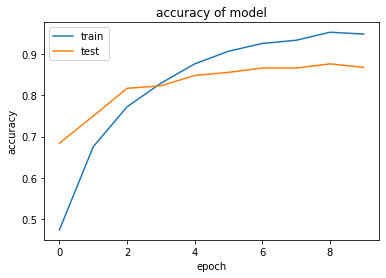

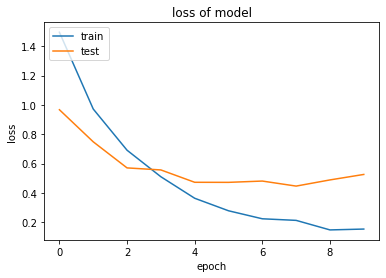

In [49]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

# Create sequential model 
cnn_model = tf.keras.models.Sequential()
#1st CNN layer  with 256 filters,
cnn_model.add(Conv1D(filters=256, kernel_size=(3,), padding='same', activation='relu', input_shape = (A_train.shape[1],1)))


#Second CNN layer  with 128 filters
cnn_model.add(Conv1D(filters=128, kernel_size=(3,), padding='same', activation='relu'))



#Second CNN layer  with 64 filters
cnn_model.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation='relu'))


cnn_model.add(Flatten())


cnn_model.add(Dense(units = 256, activation='relu'))

cnn_model.add(Dropout(0.2))

cnn_model.add(Dense(units =  128, activation='relu'))

cnn_model.add(Dropout(0.2))

cnn_model.add(Dense(units = 64, activation='relu'))

#Softmax as last layer with 10 outputs
cnn_model.add(Dense(10, activation='softmax'))

cnn_model.summary()

cnn_model.compile(optimizer='adam',loss = 'categorical_crossentropy', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='D:\\Diploma project\\Data\\audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()


history = cnn_model.fit(A_train, B_train, epochs=10, batch_size = 32, validation_data = (A_test, B_test))

duration = datetime.now() - start
print("Training completed in time: ", duration)

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy of model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss of model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [50]:
test_loss, test_acc= cnn_model.evaluate(A_test,B_test)
print("\nThe best test Accuracy is:", test_acc*100)

63/63 [==============================] - 1s 9ms/step - loss: 0.5265 - accuracy: 0.8674

The best test Accuracy is: 86.73673868179321


In [51]:
filename="C:\\Users\\Prasanth Kolachana\\OneDrive\\Desktop\\Data\\test_file\\test4-jazz.wav"
prediction_feature=extracting_the_features(filename)
prediction_feature=prediction_feature.reshape(1,-1)
predict_x=cnn_model.predict(prediction_feature) 
classes_x=np.argmax(predict_x,axis=1)

print(classes_x)

[1]


In [52]:
model = cnn_model.save('D:\Diploma project\Data')

INFO:tensorflow:Assets written to: D:\Diploma project\Data\assets


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 60, 256)           1024      
                                                                 
 conv1d_4 (Conv1D)           (None, 60, 128)           98432     
                                                                 
 conv1d_5 (Conv1D)           (None, 60, 64)            24640     
                                                                 
 flatten_1 (Flatten)         (None, 3840)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               983296    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 128)              

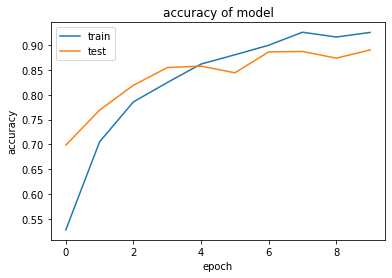

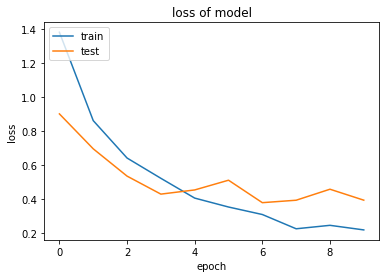

In [53]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,BatchNormalization,Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

# Create sequential model 
cnn_model2 = tf.keras.models.Sequential()
#1st CNN layer  with 256 filters,
cnn_model2.add(Conv1D(filters=256, kernel_size=(3,), padding='same', activation='elu', input_shape = (A_train.shape[1],1)))


#Second CNN layer  with 128 filters
cnn_model2.add(Conv1D(filters=128, kernel_size=(3,), padding='same', activation='elu'))



#Second CNN layer  with 64 filters
cnn_model2.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation='elu'))


cnn_model2.add(Flatten())


cnn_model2.add(Dense(units = 256, activation='elu'))

cnn_model2.add(Dropout(0.2))

cnn_model2.add(Dense(units =  128, activation='elu'))

cnn_model2.add(Dropout(0.2))

cnn_model2.add(Dense(units = 64, activation='elu'))

#Softmax as last layer with 10 outputs
cnn_model2.add(Dense(10, activation='softmax'))

cnn_model2.summary()

cnn_model2.compile(optimizer='adam',loss = 'categorical_crossentropy', metrics=['accuracy'])

#checkpointer = ModelCheckpoint(filepath='D:\\Diploma project\\Data\\audio_classification.hdf5', 
  #                             verbose=1, save_best_only=True)
start = datetime.now()


history2 = cnn_model2.fit(A_train, B_train, epochs=10, batch_size = 32, validation_data = (A_test, B_test))

duration = datetime.now() - start
print("Training completed in time: ", duration)

print(history2.history.keys())
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('accuracy of model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('loss of model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [54]:
test_loss, test_acc= cnn_model2.evaluate(A_test,B_test)
print("\nThe best test Accuracy is:", test_acc*100)

63/63 [==============================] - 1s 9ms/step - loss: 0.3939 - accuracy: 0.8904

The best test Accuracy is: 89.0390396118164


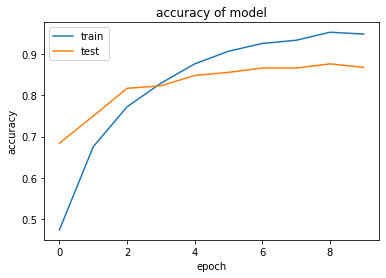

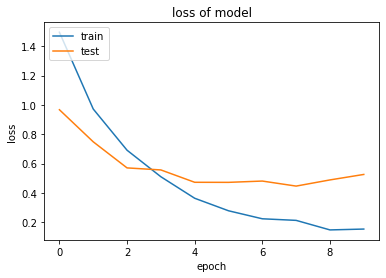

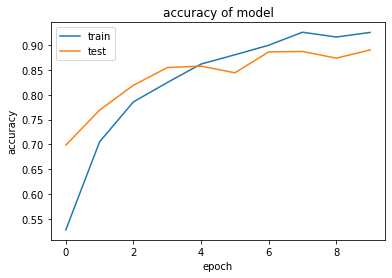

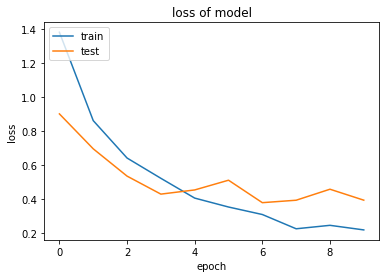

In [57]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy of model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss of model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('accuracy of model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('loss of model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [87]:
git clone git@github.com:jsalbert/sound_classification_ml_production.git

SyntaxError: invalid syntax (Temp/ipykernel_18768/3682810652.py, line 1)

In [91]:
git

NameError: name 'git' is not defined